<a href="https://colab.research.google.com/github/pgordin/ReferatTestowy/blob/main/Algorytmy_kNN_kd_tree.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Sortowanie

## Zadanie

Zaimplementować prosty algorytm sortowania (bąbelkowe, przez wstawianie).

In [1]:
import numpy as np

#lista
tablica1 = [np.random.randint(1, 100000) for i in range(0,10)]
tablica2 = tablica1.copy()
tablica2.sort()
print(tablica1)
print(tablica2)

# sortowanie bąbelkowe
def bubblesort(tablica):
  for j in range(len(tablica)):
    for i in range(1, len(tablica)):
      if tablica[i-1] > tablica[i]:
        tablica[i-1], tablica[i] = tablica[i], tablica[i-1]
  return tablica

def bubblesort2(tablica):
  zmiana = True
  while zmiana:
    zmiana = False
    for i in range(1, len(tablica)):
      if tablica[i-1] > tablica[i]:
        tablica[i-1], tablica[i] = tablica[i], tablica[i-1]
        zmiana = True
  return tablica

# sortowanie przez wstawianie
def insertionsort(tablica):
  for i in range(1, len(tablica)):
    x = tablica[i]
    j = i-1
    while j >=0 and tablica[j] > x:
      tablica[j+1] = tablica[j]
      j -= 1
    tablica[j+1] = x
  return tablica

tablica2 = tablica1.copy()
bubblesort2(tablica2)
print(tablica2)

tablica2 = tablica1.copy()
insertionsort(tablica2)
print(tablica2)



[66698, 83139, 66608, 24226, 3935, 42917, 2962, 83627, 75538, 38709]
[2962, 3935, 24226, 38709, 42917, 66608, 66698, 75538, 83139, 83627]
[2962, 3935, 24226, 38709, 42917, 66608, 66698, 75538, 83139, 83627]
[2962, 3935, 24226, 38709, 42917, 66608, 66698, 75538, 83139, 83627]


In [2]:
# jak szybko to działa
n = 1000
tablica1 = [np.random.randint(1, 100000) for i in range(0,n)]


def test1(tablica1):
  tablica2 = tablica1.copy()
  tablica2.sort()

%timeit test1(tablica1)

def test2(tablica1, funkcja):
  tablica2 = tablica1.copy()
  funkcja(tablica2)

%timeit test2(tablica1, bubblesort)
%timeit test2(tablica1, bubblesort2)
%timeit test2(tablica1, insertionsort)



1000 loops, best of 5: 247 µs per loop
1 loop, best of 5: 368 ms per loop
1 loop, best of 5: 326 ms per loop
10 loops, best of 5: 106 ms per loop


## Sortowanie szybkie

In [3]:
"""
QuickSort po mojemu
"""

def QuickSort(tablica):
    # sortowanie szybkie
    def QSort(d, g):
        # pomocnicza procedura - sortuje fragment od d do g
        i = d
        j = g
        x = tablica[np.random.randint(d, g+1)]
        while i <= j:
            while tablica[i] < x:
                i += 1
            while tablica[j] > x:
                j -= 1
            if i <= j:
                tablica[i], tablica[j] = tablica[j], tablica[i]
                i += 1
                j -= 1
        if d < j:
            QSort(d, j)
        if i < g:
            QSort(i, g)

    QSort(0, len(tablica)-1)

In [4]:
# Test lista
tablica1 = [np.random.randint(1, 100000) for i in range(0,100)]
tablica2 = tablica1.copy()
print(tablica2.sort())
print(tablica1)
QuickSort(tablica1)
print(tablica1)

#numpy
tablica3 = (np.random.randint(1, 100000, size = 100))
tablica3.sort()
print(tablica3)

n = 10000

def test1(n):
  tablica1 = [np.random.randint(1, 100000) for i in range(0,n)]
  QuickSort(tablica1)

%timeit test1(n)

def test2(n):
  tablica1 = [np.random.randint(1, 100000) for i in range(0,n)]
  tablica1.sort()

%timeit test2(n)

def test3(n):
  tablica2 = (np.random.randint(1, 100000, size = n))
  QuickSort(tablica2)

%timeit test3(n)

def test4(n):
  tablica2 = (np.random.randint(1, 100000, size = n))
  tablica2.sort()

%timeit test4(n)


None
[93995, 35332, 2337, 89622, 11419, 71120, 46616, 25935, 33407, 98884, 14076, 93535, 15012, 32887, 83205, 32172, 51611, 93689, 24521, 57625, 88291, 23211, 7589, 97301, 48959, 13801, 38668, 93774, 74401, 40532, 85627, 64224, 12476, 24937, 53315, 86565, 28130, 33462, 61302, 79073, 89696, 45598, 77416, 8329, 75739, 52503, 63162, 21315, 67053, 92020, 21477, 36725, 73579, 93950, 59377, 55073, 87352, 63687, 99320, 27537, 77260, 21384, 15741, 7691, 83058, 51238, 93783, 13840, 16032, 55137, 48242, 93452, 71949, 27374, 80334, 45340, 20743, 79781, 56449, 88626, 19489, 70093, 80096, 10416, 51553, 76473, 7025, 5455, 10411, 3224, 38527, 51296, 87460, 11350, 81608, 68702, 73736, 32863, 83375, 6051]
[2337, 3224, 5455, 6051, 7025, 7589, 7691, 8329, 10411, 10416, 11350, 11419, 12476, 13801, 13840, 14076, 15012, 15741, 16032, 19489, 20743, 21315, 21384, 21477, 23211, 24521, 24937, 25935, 27374, 27537, 28130, 32172, 32863, 32887, 33407, 33462, 35332, 36725, 38527, 38668, 40532, 45340, 45598, 46616, 4

### Zadanie

Przerobić powyższy kod na wyznaczanie statystyk pozycyjnych.

In [5]:
def QuickPos(tablica, m):
    # szybkie statystyki pozycyjne - szukamy m-tego najmniejszego elementu w tablicy
    def QPos(d, g, m):
        # pomocnicza procedura - przeszukuje fragment od d do g
        i = d
        j = g
        x = tablica[np.random.randint(d, g+1)]
        while i <= j:
            while tablica[i] < x:
                i += 1
            while tablica[j] > x:
                j -= 1
            if i <= j:
                tablica[i], tablica[j] = tablica[j], tablica[i]
                i += 1
                j -= 1
        if d < j and m <= j:
            QPos(d, j, m)
        if i < g and m >= i:
            QPos(i, g, m)

    QPos(0, len(tablica)-1, m)
    return tablica[m]


Sprawdzenie, czy działa.

In [6]:
tablica1 = [np.random.randint(1, 100000) for i in range(0,100)]
tablica2 = tablica1.copy()
QuickSort(tablica1)
print(tablica1)
print(QuickPos(tablica2, 5))

n = 10000

def test5(n):
  tablica1 = [np.random.randint(1, 100000) for i in range(0,n)]
  QuickPos(tablica1, 100)

%timeit test5(n)


[3325, 4501, 5957, 7185, 7768, 7851, 8368, 9409, 9855, 9904, 10406, 10805, 13541, 15130, 16628, 19975, 21007, 21089, 21948, 22054, 23208, 23847, 25067, 26813, 26943, 27090, 28164, 28612, 28966, 29230, 29285, 31166, 32030, 32162, 36578, 37294, 38407, 38691, 39161, 41700, 42520, 43234, 44159, 44467, 44708, 45660, 48557, 48653, 49179, 50368, 51621, 52139, 54241, 54726, 57075, 58468, 59206, 60782, 61443, 61523, 62428, 62507, 62672, 63142, 64018, 66572, 66848, 68816, 69442, 69522, 69818, 71270, 71681, 71699, 72614, 72633, 72870, 73341, 73552, 73555, 74314, 75401, 75818, 80417, 81552, 81810, 82029, 84859, 85535, 86320, 88349, 89754, 89819, 93400, 94162, 94263, 94625, 98302, 98660, 99996]
7851
10 loops, best of 5: 29.7 ms per loop


# Drzewa BST

Podstawowe funkcje do drzew BST.

In [7]:
def new_node(value):
  """
  Nowy wierzchołek drzewa
  """
  return {'val': value, 'n': 1, 'left': None, 'right': None}

In [8]:
def add_value(tree, value):
  """
  Dodanie nowej wartości do drzewa
  """
  if value < tree['val']:   # dodaj do lewego poddrzewa
    if tree['left'] is None:
      tree['left'] = new_node(value)
    else:
      add_value(tree['left'], value)
  elif value > tree['val']: # dodaj do prawego poddrzewa
    if tree['right'] is None:
      tree['right'] = new_node(value)
    else:
      add_value(tree['right'], value)
  else:
    tree['n'] += 1  # wartość już jest - doliczmy wystapienie

Wypisywanie zawartości drzewa.

In [9]:
def print_inorder(tree):
  """
  Wypisanie zawartości drzewa
  """
  if tree['left'] is not None:
    print_inorder(tree['left'])
  print("{v}: {n}".format(v = tree['val'], n = tree['n']))
  if tree['right'] is not None:
    print_inorder(tree['right'])

## Przykłady działania

In [10]:
tree = new_node(7)
add_value(tree, 10)
add_value(tree, 5)
add_value(tree, 7)
add_value(tree, 13)
add_value(tree, 8)
add_value(tree, 9)
add_value(tree, 9)
add_value(tree, 3)
add_value(tree, 6)
add_value(tree, 3)
print_inorder(tree)

3: 2
5: 1
6: 1
7: 2
8: 1
9: 2
10: 1
13: 1


In [11]:
tree = new_node(np.random.randint(1,100))
for i in range(1000):
  add_value(tree, np.random.randint(1, 100))
print_inorder(tree)

1: 15
2: 14
3: 7
4: 9
5: 6
6: 7
7: 10
8: 9
9: 11
10: 9
11: 12
12: 9
13: 8
14: 12
15: 12
16: 10
17: 10
18: 9
19: 9
20: 7
21: 5
22: 14
23: 12
24: 7
25: 8
26: 16
27: 9
28: 9
29: 17
30: 9
31: 11
32: 9
33: 18
34: 10
35: 5
36: 10
37: 12
38: 6
39: 7
40: 14
41: 9
42: 17
43: 10
44: 10
45: 7
46: 13
47: 11
48: 11
49: 19
50: 14
51: 11
52: 10
53: 10
54: 18
55: 9
56: 13
57: 18
58: 10
59: 12
60: 7
61: 10
62: 7
63: 9
64: 6
65: 7
66: 10
67: 11
68: 19
69: 11
70: 7
71: 5
72: 8
73: 13
74: 6
75: 12
76: 5
77: 9
78: 13
79: 14
80: 11
81: 5
82: 10
83: 13
84: 12
85: 5
86: 8
87: 5
88: 3
89: 15
90: 10
91: 6
92: 12
93: 11
94: 15
95: 6
96: 9
97: 8
98: 6
99: 7


In [12]:
print(100*0.99**1000)

0.004317124741065786


# Drzewiaste struktury danych dla problemu najbliższego sąsiada

Rozpocznijmy od wczytania danych (na dwa sposoby).

Pierwszy (łatwiejszy) &mdash; przez upload; drugi &mdash; bezpośrednio z dysku Google.

In [13]:
import pandas as pd
from google.colab import files

uploaded = files.upload()

Saving dane2b.csv to dane2b.csv


In [14]:
import io

df1 = pd.read_csv(io.BytesIO(uploaded['dane2b.csv']), sep=";",decimal=",")
df1.head()

,x,y,klasa
0,0.767749,-1.176654,1
1,0.172735,-0.576948,3
2,0.441339,0.382382,3
3,-0.345603,-0.058987,3
4,-0.844281,0.426800,3


Poszło. To teraz drugi sposób.

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [16]:
import os

!ls

dane2b.csv  drive  sample_data


In [17]:
%cd /content/drive/MyDrive/'Colab Notebooks'
!ls

/content/drive/MyDrive/Colab Notebooks
 Algorytmy.ipynb
 Algorytmy_kNN_kd_tree.ipynb
 BST.ipynb
 cdr_d.csv
'Część 0 - kilka przykładów (1).ipynb'
'Część 0 - kilka przykładów (bonus).ipynb'
'Część 0 - kilka przykładów.ipynb'
'Część 1 - Numpy - PG.ipynb'
'Część 2 - Instrukcje sterujące.ipynb'
'Część 4 - Funkcje.ipynb'
'Część 4 - kNN.ipynb'
'Część 1 - Preprocessing.ipynb'
'Część 1 - Proste komendy (1).ipynb'
'Część 1 - Proste komendy.ipynb'
'Część 2 - Regresja.ipynb'
'Część 3 - Regresja regularyzowana.ipynb'
'Część 3 - Regresja regularyzowana_PG_zmiany.ipynb'
 Część 3_Regresja_regularyzowana_PG_zmiany.ipynb
'Część 6 - Regresja logistyczna (1).ipynb'
'Część 6 - Regresja logistyczna (2).ipynb'
'Część 6 - Regresja logistyczna.ipynb'
 dane1b.csv
 dane1.csv
'dane2b (1).csv'
 dane2b.csv
 dane2.csv
'Elementy klasyfikacji.ipynb'
'Funkcje i rekurencja.ipynb'
 Grafy4b.ipynb
 Grafy4.ipynb
 HVAC_211203.ipynb
 kNN_kd_tree.ipynb
'Kopia notatnika in

In [21]:
df1 = pd.read_csv("dane2.csv") # ten plik csv był w stylu amerykańskim 
df1.head()

,x,y,klasa
0,0.767749,-1.176654,1
1,0.172735,-0.576948,3
2,0.441339,0.382382,3
3,-0.345603,-0.058987,3
4,-0.844281,0.426800,3


Dane już wczytanie: gotowy, prosty problem klasyfikacyjny, z obrazkiem poniżej.

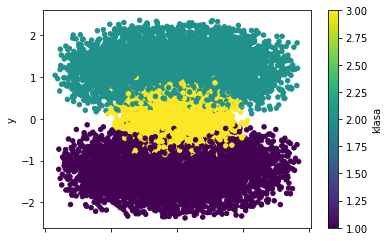

In [22]:
%matplotlib inline
import matplotlib.pyplot as plt

df1.plot.scatter(x = 'x', y = 'y', c = 'klasa', colormap = 'viridis')
plt.show()

Rozbijmy go na część uczącą i testową (na piechotę).

In [23]:
import numpy as np

p = 0.2
split = np.random.rand(len(df1)) < 1-p
train = df1[split]
test = df1[~split]

print(len(df1), ";", len(train), "; ", len(test))
print(test.head())
print(test['x'][0]) # jedno z tych wywoła błąd
print(train['x'][0])


10000 ; 8030 ;  1970
           x         y  klasa
5   0.532567 -1.370697      1
9  -0.506647 -0.468267      3
11 -1.346058 -1.542687      1
17 -1.038293 -1.376540      1
19  0.020270  0.633397      2


KeyError: ignored

## Metoda najbliższych sąsiadów z pakietu *sklearn*.

In [24]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = 1)
classifier.fit(train[['x', 'y']], train['klasa'])
y_pred = classifier.predict(test[['x', 'y']])

In [25]:
from sklearn.metrics import confusion_matrix

pd.DataFrame(confusion_matrix(test['klasa'], y_pred))

,0,1,2
0,740,0,41
1,0,749,56
2,50,37,297


W zasadzie zrobione.

Naturalne jest nastepujące:

### Zadanie

Ten model jest bardzo prosty. Może da się go wykonac ,,na piechotę''? Dla każdego punktu w zbiorze testowym znaleźć najbliższy mu w zbiorze uczącym (metryka euklidesowa) i przypisać właściwą klasę. Uprośćmy kwestię remisów: w razie braku jednoznaczności (wiecej niż jeden najbliższy sąsiad) możemy zdecydować dowolnie (np. wybierając klasę pierwszego napotkanego).

Uwaga na **czas wywołania** &mdash; ograniczmy się do pierwszych 20 wartości ze zbioru testowego.

In [26]:
n = 20
yy_pred = np.zeros(n)

for i in range(n):
  dist = 100 # duża liczba
  k = -1 #nierealna wartość
  for j in range(len(train)):
    dd = ((test.iloc[i, 0] - train.iloc[j, 0])**2 + (test.iloc[i, 1] - train.iloc[j, 1])**2)**(1/2)
    if (dd < dist):
      dist = dd
      k = j
  #print(dist, " ", k)
  #print("--------------------------")
  yy_pred[i] = train.iloc[k, 2]

In [27]:
pd.crosstab(test.iloc[:n,2], yy_pred, rownames=['Faktyczne'], colnames=['Prognoza'])

Prognoza,1.0,2.0,3.0
Faktyczne,,,
1,9,0,0
2,0,3,1
3,2,0,5


Widać, że trwa to za długo. Dlatego trzeba pomyśleć o lepszej strukturze danych i zorganizowaniu obliczeń.

## Podejcie przez $kd$-drzewa

Pomocniczym narzędziem będzie funkcja do wyznaczania mediany, realizowana we wcześniejszym zadaniu, zmodyfikowana tylko o dodanie wielu wymiarów &mdash; na raz obsługuje się jeden, wybrany.

In [28]:
def QPos(d, g, m, dim):
  #pomocnicza procedura - sortuje fragment między d a g
  if (d < g): 
    x = tablica[np.random.randint(d, g), dim]
  else:
    x = tablica[d, dim]
  # podział elementów
  i = d
  j = g
  while i <= j:
    while tablica[i, dim] < x:
      i += 1
    while tablica[j, dim] > x:
      j -= 1
    if i <= j: #zamiana
      tablica[i], tablica[j] = tablica[j].copy(), tablica[i].copy()
      i += 1
      j -= 1
  # rekurencyjne wywołanie
  if d < j and m <= j:
    QPos(d, j, m, dim)
  if i < g and m >= i:
    QPos(i, g, m, dim)

Sprawdźmy jak to działa

In [29]:
tablica = train.iloc[:15,::].values.copy()
print(tablica)

[[ 0.76774942 -1.17665442  1.        ]
 [ 0.17273479 -0.57694783  3.        ]
 [ 0.44133935  0.38238156  3.        ]
 [-0.34560289 -0.05898724  3.        ]
 [-0.84428058  0.42679995  3.        ]
 [-0.48047862 -0.65843195  3.        ]
 [-0.70398414  1.27653672  2.        ]
 [-0.23668734  0.05954071  3.        ]
 [-0.39110304  1.32357784  2.        ]
 [-1.10778104 -0.99693314  1.        ]
 [ 1.11112495 -1.62810701  1.        ]
 [-0.07412579 -1.74436852  1.        ]
 [-0.15738929  1.27731379  2.        ]
 [ 0.06171495 -0.98340774  1.        ]
 [-1.45554578  1.20803872  2.        ]]


In [30]:
QPos(0, len(tablica)-1, 7, 0)
wynik = tablica[7]
print(wynik)
print(tablica)

[-0.23668734  0.05954071  3.        ]
[[-1.45554578  1.20803872  2.        ]
 [-0.39110304  1.32357784  2.        ]
 [-1.10778104 -0.99693314  1.        ]
 [-0.34560289 -0.05898724  3.        ]
 [-0.84428058  0.42679995  3.        ]
 [-0.48047862 -0.65843195  3.        ]
 [-0.70398414  1.27653672  2.        ]
 [-0.23668734  0.05954071  3.        ]
 [-0.15738929  1.27731379  2.        ]
 [-0.07412579 -1.74436852  1.        ]
 [ 1.11112495 -1.62810701  1.        ]
 [ 0.44133935  0.38238156  3.        ]
 [ 0.17273479 -0.57694783  3.        ]
 [ 0.06171495 -0.98340774  1.        ]
 [ 0.76774942 -1.17665442  1.        ]]


Zaczynamy tworzyć drzewo w oparciu o wielowymiarową tablicę.

In [31]:
def new_node(d, g):
  return {'d': d, 'g': g, 'val' : None, 'dim': None, 'left': None, 'right': None}

In [32]:
tablica = train.values.copy()
print(len(tablica))
root = new_node(0, len(tablica)-1)

8030


In [33]:
def split_data(t):
  if t['d'] < t['g'] : # więcej niż jeden element
    dim = np.random.randint(0,2)
    t['dim'] = dim
    m = (t['d']+t['g']+1)//2
    QPos(t['d'], t['g'], m, dim) #podział według losowego wymiaru
    t['val'] = tablica[m, dim]
    t['left'] = new_node(t['d'], m-1)
    t['right'] = new_node(m, t['g'])
    split_data(t['left'])
    split_data(t['right'])

split_data(root)

In [34]:
def find_element(t, x, dist):
  global mindist
  global minindex
  if t['dim'] is None:
    # liśc - jest wartość
    j = t['d']
    dd = ((tablica[j,0]-x[0])**2 + (tablica[j,1]-x[1])**2)**(1/2)
    if dd < mindist:
      mindist = dd
      minindex = j
  else:
    dim = t['dim']
    val = t['val']
    if x[dim] < val:
      find_element(t['left'], x, dist)
      newdist = dist.copy()
      newdist[dim] = val - x[dim]
      if (newdist[0]**2 + newdist[1]**2)**(1/2) < mindist:
        find_element(t['right'], x, newdist)
    else:
      find_element(t['right'], x, dist)
      newdist = dist.copy()
      newdist[dim] = x[dim] - val
      if (newdist[0]**2 + newdist[1]**2)**(1/2) < mindist:
        find_element(t['left'], x, newdist)


In [35]:
n = 20
yy_pred = np.zeros(n)

for i in range(n):
  mindist = 100 # duża liczba
  minindex = -1 #nierealna wartość
  find_element(root, test.iloc[i,:], [0, 0])
  #print(mindist, " ", minindex)
  #print("--------------------------")
  yy_pred[i] = tablica[minindex, 2] 
  
pd.crosstab(test.iloc[:n,2], yy_pred, rownames=['Faktyczne'], colnames=['Prognoza'])

Prognoza,1.0,2.0,3.0
Faktyczne,,,
1,9,0,0
2,0,3,1
3,2,0,5


Skoro działa szybko, sprawnie i skutecznie, sprawdźmy na pełnym zbiorze treningowym. Wynik w 1,142s (trochę gorzej niż *sklearn* &mdash; około 0,3s, ale akceptowalnie). Wyniki są takie same &mdash; to znaczy, że nie było remisów.

In [36]:
n = len(test)
yy_pred = np.zeros(n)

for i in range(n):
  mindist = 100 # duża liczba
  minindex = -1 #nierealna wartość
  find_element(root, test.iloc[i,:], [0, 0])
  yy_pred[i] = tablica[minindex, 2] 

pd.crosstab(test.iloc[:n,2], yy_pred, rownames=['Faktyczne'], colnames=['Prognoza'])

Prognoza,1.0,2.0,3.0
Faktyczne,,,
1,740,0,41
2,0,749,56
3,50,37,297
